In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

In [3]:
TCMB = 2.7255  # Kelvin
hplanck = 6.626070150e-34  # MKS
kboltz = 1.380649e-23  # MKS

In [4]:
def powerlaw(ell, beta):
    return (ell / 80.)**beta

In [5]:
def normed_cmb_thermo_units(nu):
    X = hplanck * nu / (kboltz * TCMB)
    eX = np.exp(X)
    return eX * X**4 / (eX - 1.)**2

In [6]:
def normed_synch(nu, beta):
    nu0 = 2.3e9
    if beta is not np.array:
        beta = np.array(beta)
    return (nu/nu0)**(2.+beta[..., np.newaxis])

In [7]:
def scale_synch(nu, beta):
    unit = normed_synch(nu, beta) * normed_cmb_thermo_units(2.3e9) / normed_cmb_thermo_units(nu)
    return unit

In [8]:
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2

In [9]:
nside = 128

In [10]:
ells = np.arange(1,386)

In [11]:
pcls = A_BB * powerlaw(ells, alpha_BB)
pcls[0] = 0
pcls[1] = 0

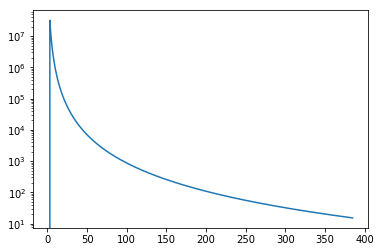

In [12]:
semilogy(ells, pcls)

In [14]:
sbb = hp.synfast(pcls, nside, new=True, verbose=False)

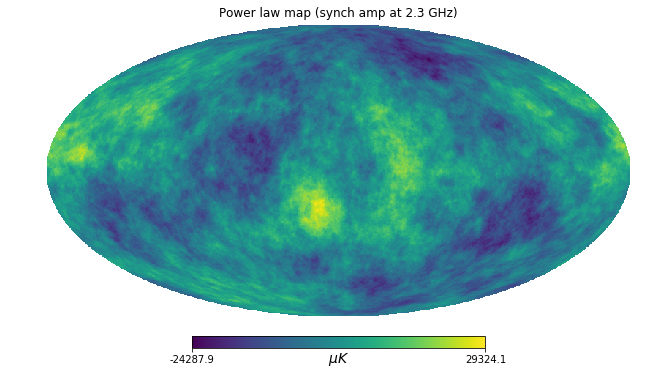

In [15]:
hp.mollview(sbb, unit='$\mu K$', title='Power law map (synch amp at 2.3 GHz)')

In [16]:
check_cls = hp.anafast(sbb)

(1, 1000000000.0)

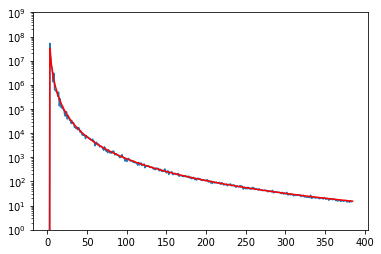

In [17]:
semilogy(ells[:-1], check_cls)
semilogy(ells, pcls, 'r')
ylim(1, 1e9)

In [18]:
freqs = np.linspace(10, 200, 20)*1.e9

In [19]:
sed_scaling = scale_synch(freqs, beta_BB)

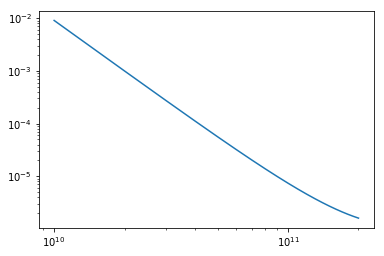

In [20]:
loglog(freqs, sed_scaling)

In [21]:
newmaps = sbb * sed_scaling[..., np.newaxis]


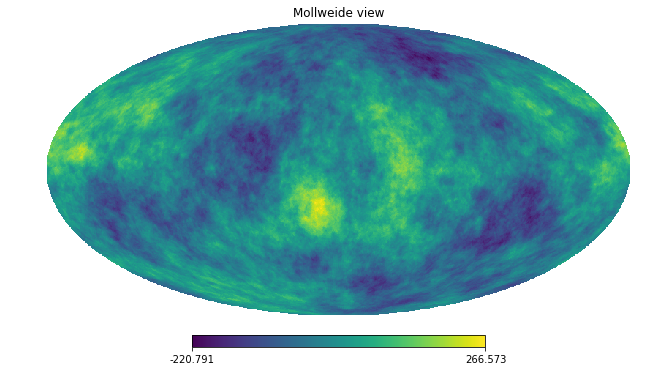

In [22]:
hp.mollview(newmaps[0])

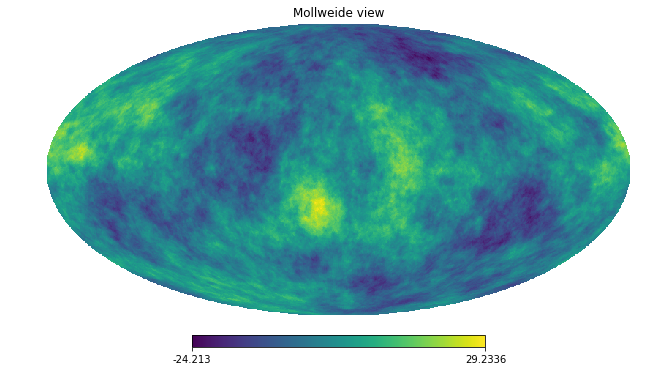

In [23]:
hp.mollview(newmaps[1])

In [24]:
beta_sigma = 1.5e-6
beta_cls = beta_sigma * np.ones_like(ells)

In [25]:
beta_map = hp.synfast(beta_cls, nside)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [26]:
beta_map -= np.mean(beta_map) + 3.2

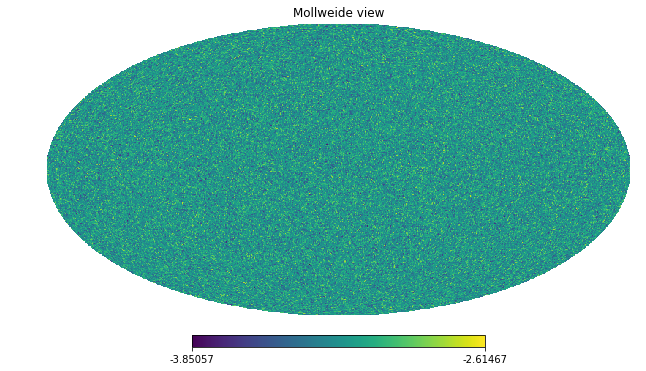

In [27]:
hp.mollview(beta_map)

In [28]:
check_bcls = hp.anafast(beta_map)

In [29]:
np.mean(beta_map)

-3.2000000000000006

In [30]:
np.sqrt(check_bcls[0]/(4*pi))

3.1999994626647754

(1e-07, 1e-05)

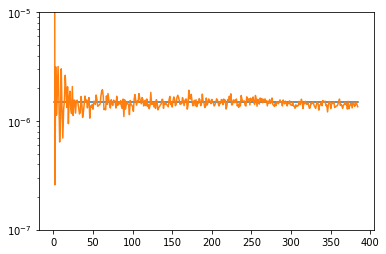

In [31]:
semilogy(ells, beta_cls)
semilogy(ells[:-1], check_bcls)
ylim(1e-7, 1e-5)

In [32]:
new_sed_scaling = scale_synch(freqs, beta_map)
new_sed_scaling.shape

(196608, 20)

In [33]:
np.mean(new_sed_scaling, axis=0)

array([9.26473557e-03, 1.03874000e-03, 2.92365994e-04, 1.20193852e-04,
       6.09281333e-05, 3.53185235e-05, 2.24893929e-05, 1.53572275e-05,
       1.10730215e-05, 8.34102068e-06, 6.51421404e-06, 5.24487447e-06,
       4.33466598e-06, 3.66476315e-06, 3.16097570e-06, 2.77532549e-06,
       2.47583405e-06, 2.24062242e-06, 2.05437747e-06, 1.90616793e-06])

In [34]:
sed_scaling

array([9.09057988e-03, 9.96914131e-04, 2.75903868e-04, 1.11881611e-04,
       5.60584089e-05, 3.21672804e-05, 2.02984161e-05, 1.37482889e-05,
       9.83918199e-06, 7.36073936e-06, 5.71197094e-06, 4.57153659e-06,
       3.75701449e-06, 3.15958919e-06, 2.71159375e-06, 2.36943130e-06,
       2.10414306e-06, 1.89597796e-06, 1.73115107e-06, 1.59984630e-06])

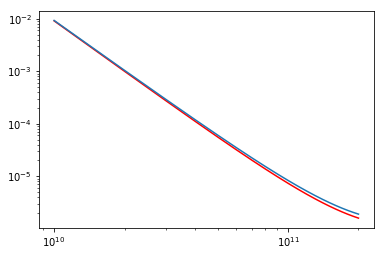

In [35]:
loglog(freqs, sed_scaling, 'r')
loglog(freqs, np.mean(new_sed_scaling, axis=0))

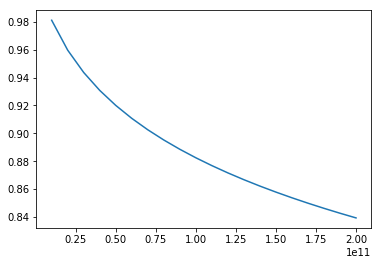

In [36]:
plot(freqs, sed_scaling / np.mean(new_sed_scaling, axis=0))

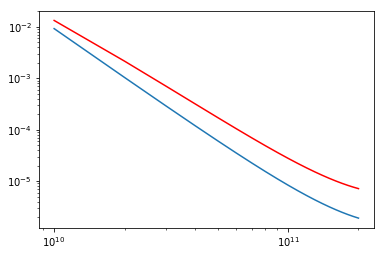

In [37]:
loglog(freqs, sed_scaling * np.log(freqs/2.3e9), 'r')
loglog(freqs, np.mean(new_sed_scaling, axis=0))

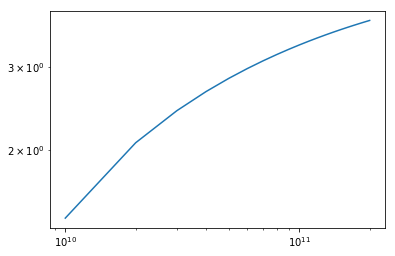

In [38]:
loglog(freqs, sed_scaling * np.log(freqs/2.3e9) / np.mean(new_sed_scaling, axis=0))

In [39]:
sed_scaling * np.log(freqs/2.3e9) / np.mean(new_sed_scaling, axis=0)

array([1.44204945, 2.07573498, 2.42367676, 2.6584601 , 2.83301352,
       2.97043868, 3.08283059, 3.17728528, 3.25830686, 3.32892478,
       3.39126938, 3.44689263, 3.49695822, 3.54235971, 3.5837973 ,
       3.62182915, 3.65690692, 3.68940091, 3.7196182 , 3.74781609])

In [40]:
# well thats not good

In [41]:
from scipy.stats import kstest, norm

In [42]:
np.std(beta_map)

0.13254931818087276

In [43]:
x = np.linspace(-3.8, -2.6)
y = norm(-3.2, 0.133)

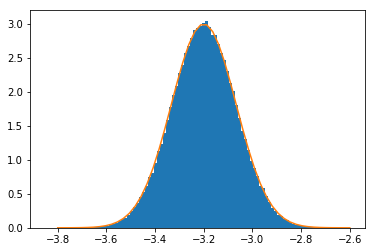

In [44]:
hist(beta_map, bins=100, density=True);
plot(x, y.pdf(x))

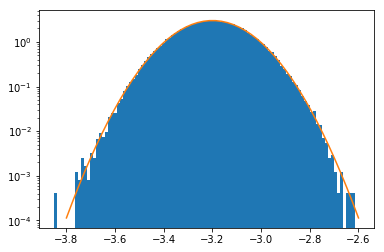

In [45]:
hist(beta_map, bins=100, density=True);
plot(x, y.pdf(x))
yscale('log')

In [46]:
new_sed_scaling.shape

(196608, 20)

In [47]:
np.mean(new_sed_scaling[:,0])

0.009264735570608102

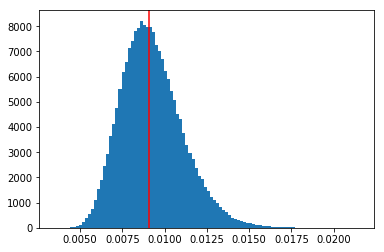

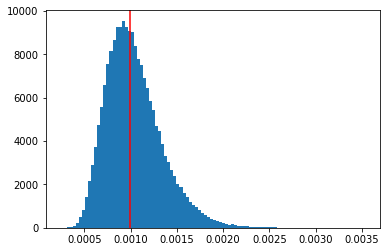

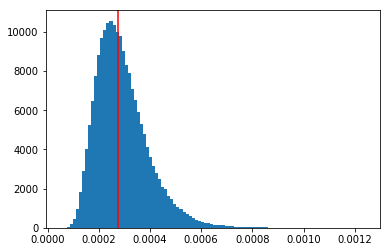

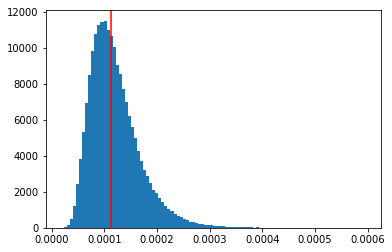

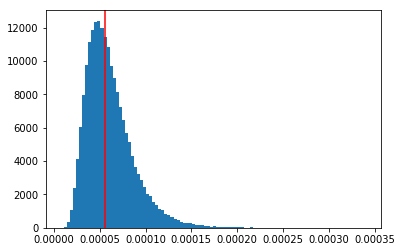

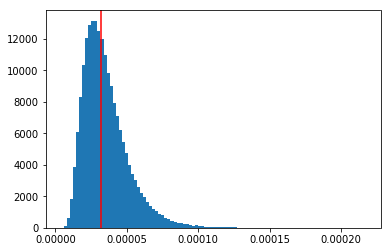

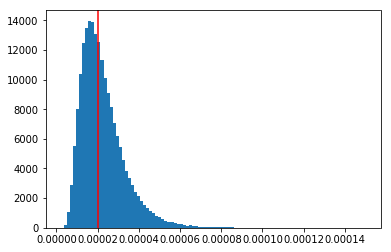

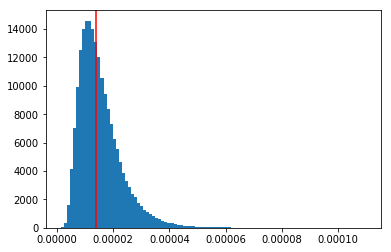

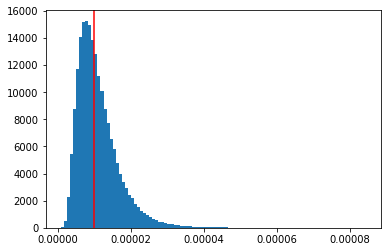

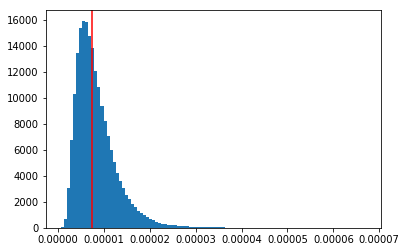

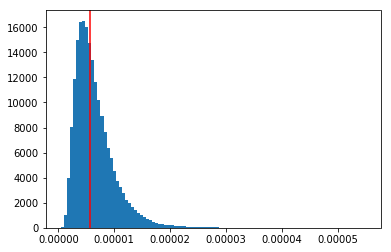

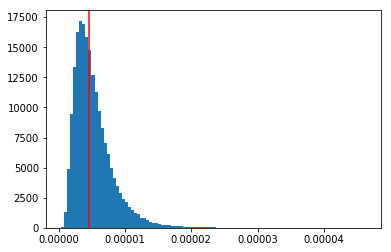

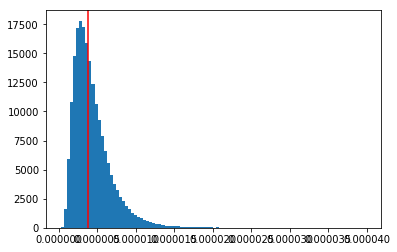

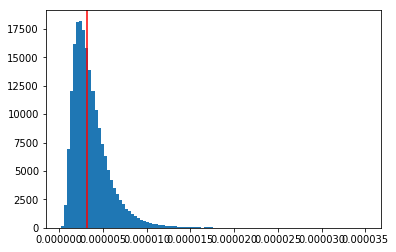

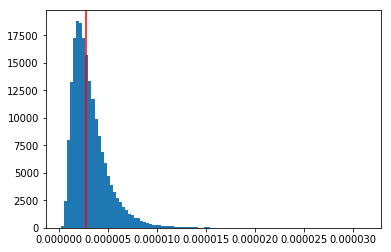

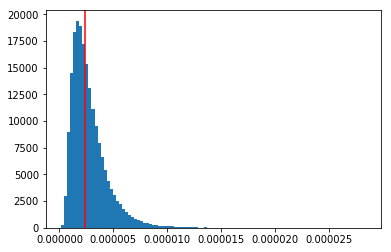

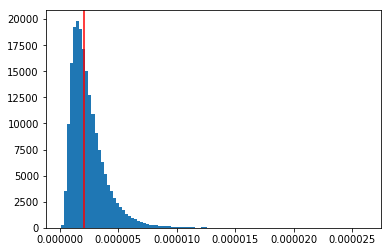

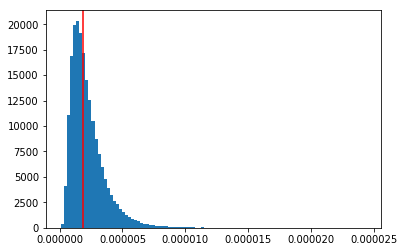

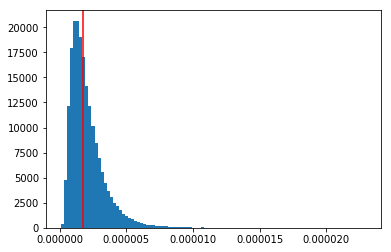

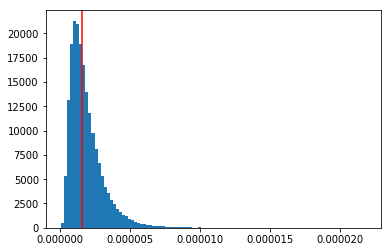

In [48]:
for k in range(20):
    figure()
    hist(new_sed_scaling[:, k], bins=100);
    axvline(sed_scaling[k], color='r')

In [49]:
x = (sbb[..., np.newaxis] * new_sed_scaling).T

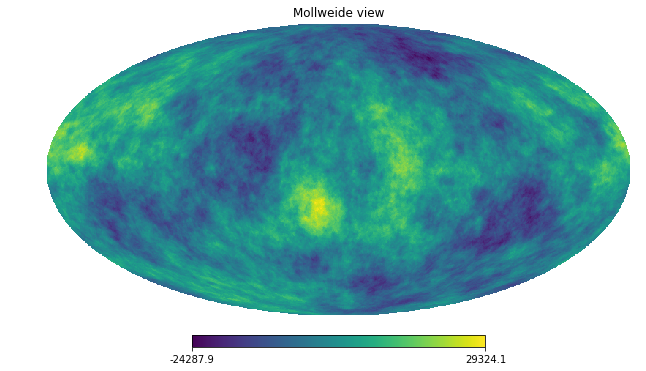

In [50]:
hp.mollview(sbb)

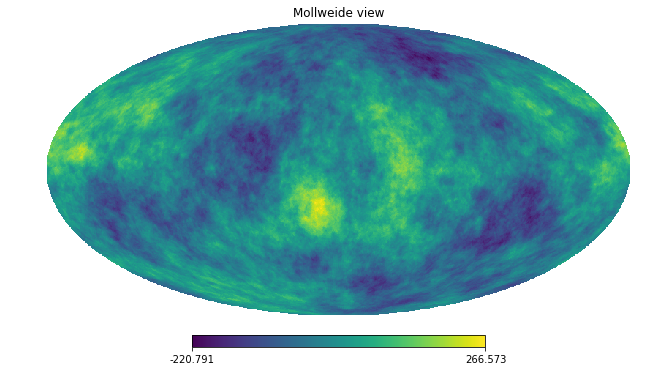

In [51]:
hp.mollview(newmaps[0])

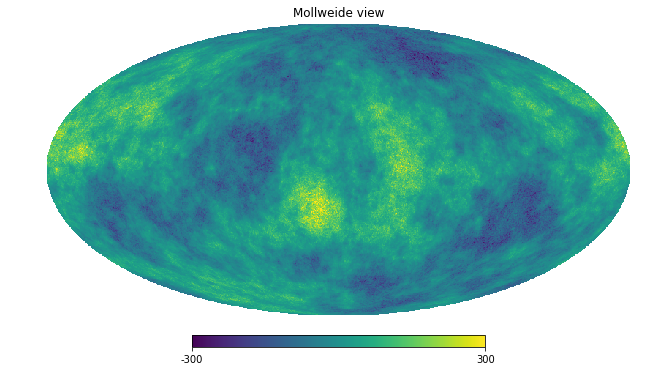

In [52]:
hp.mollview(x[0], min=-300, max=300)

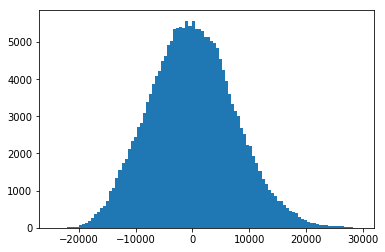

In [53]:
hist(sbb, bins=100);

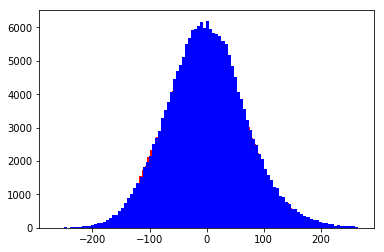

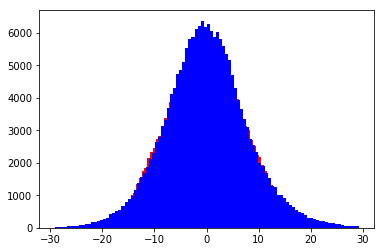

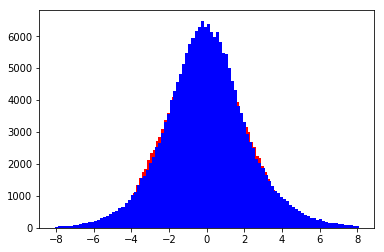

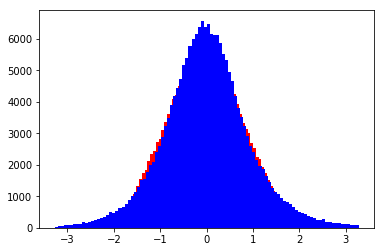

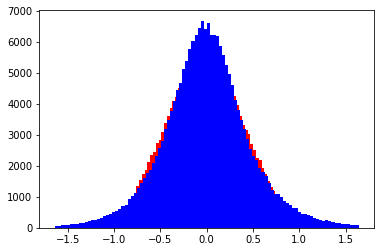

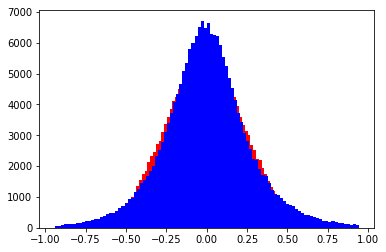

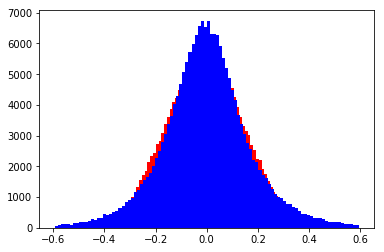

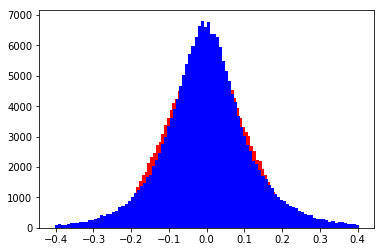

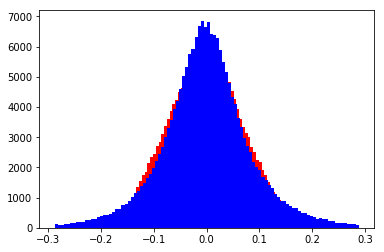

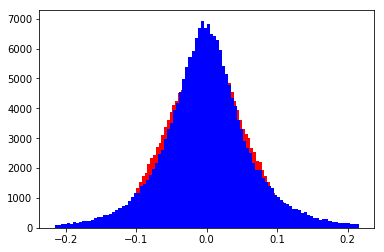

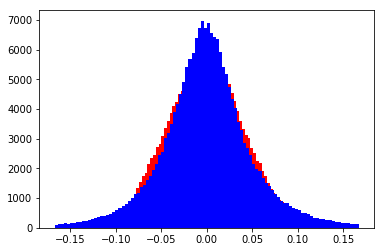

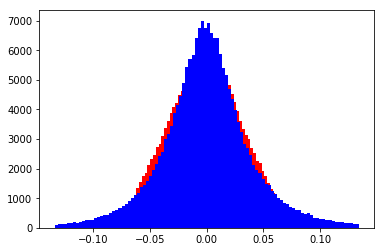

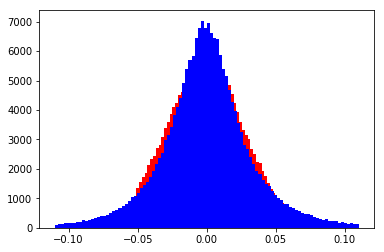

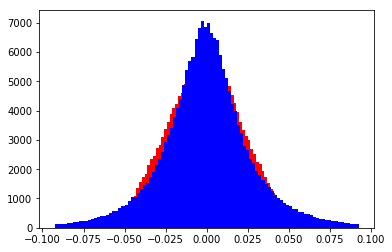

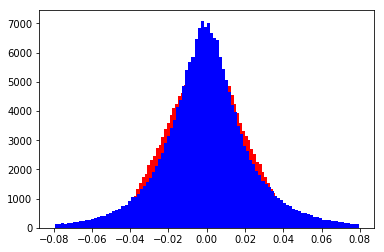

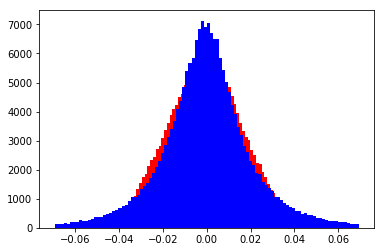

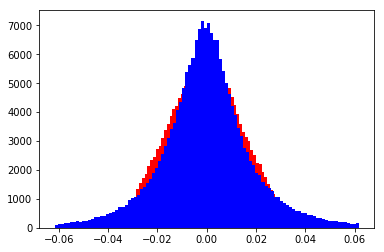

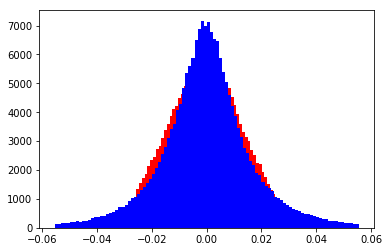

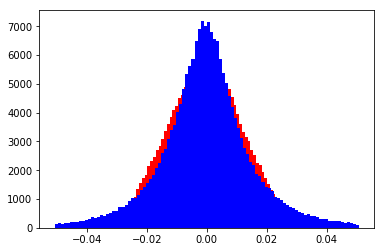

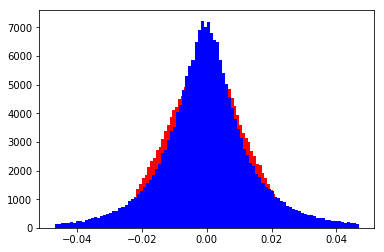

In [54]:
for k in range(20):
    figure()
    xmask = np.abs(x[k]) < np.abs(newmaps[k]).max()
    hist(newmaps[k], bins=100, color='r');
    hist(x[k][xmask], bins=100, color='b');

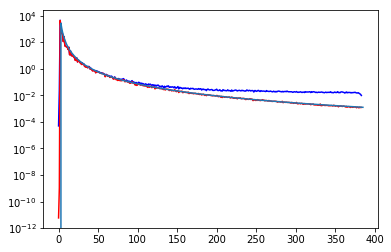

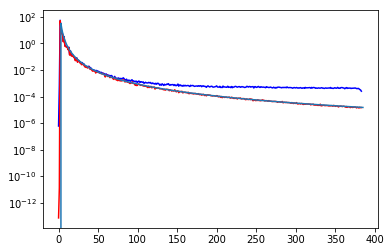

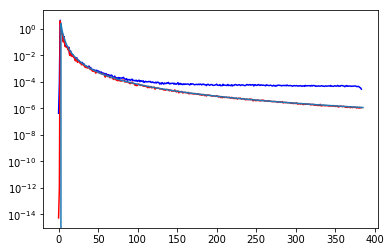

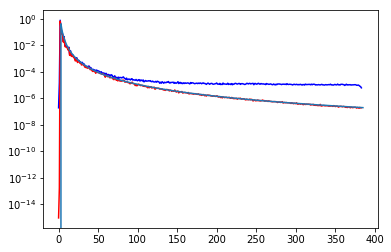

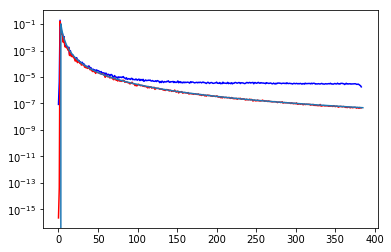

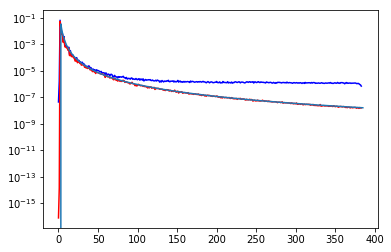

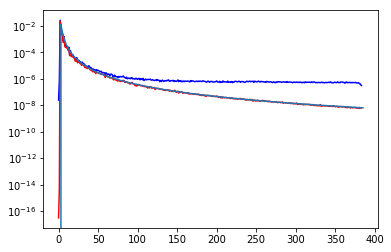

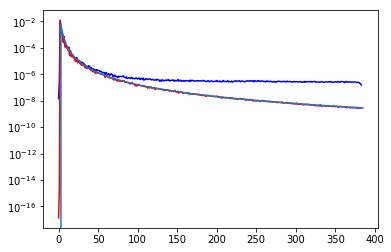

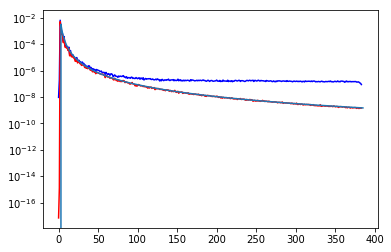

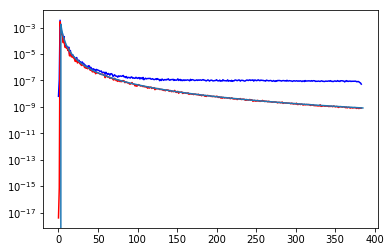

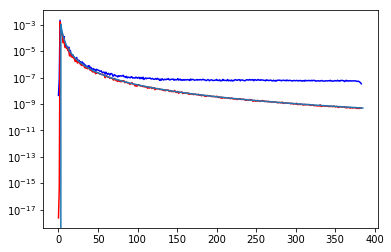

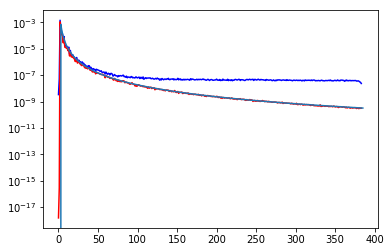

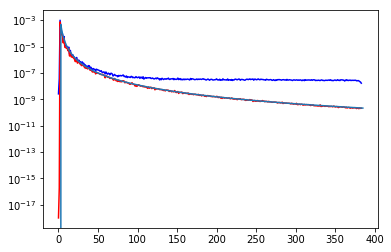

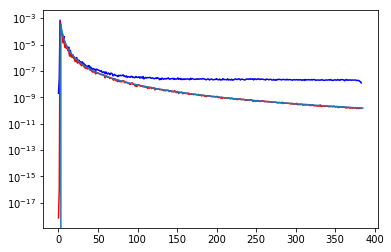

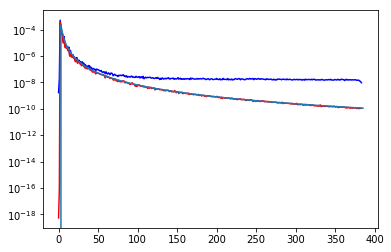

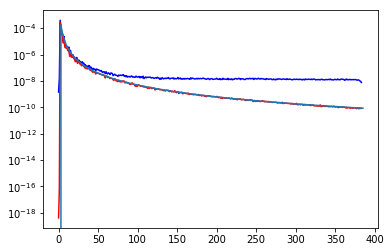

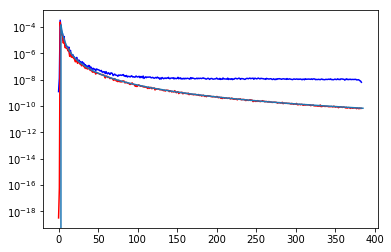

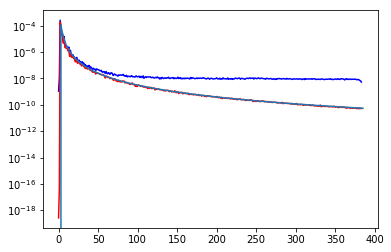

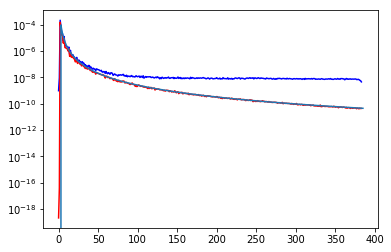

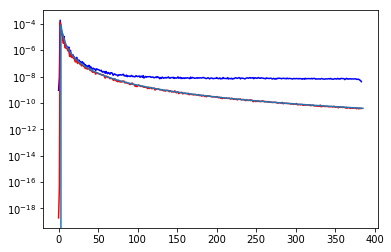

In [55]:
for k in range(20):
    figure()
    newcls = hp.anafast(x[k])
    oldcls = hp.anafast(newmaps[k])
    semilogy(newcls, 'b')
    semilogy(oldcls, 'r')
    semilogy(ells, pcls*sed_scaling[k]**2)

In [56]:
from pyshtools.utils import Wigner3j
import time

In [60]:
start=time.time()
total = np.zeros(800)
for ell1 in ells[1:]:
    for ell2 in ells[1:]:
        w3j, ellmin, ellmax = Wigner3j(ell1, ell2, 0, 0, 0 )
        #finding where the highest nonzero element is
        indexmax = np.where(w3j!=0)[0][-1] + 1
        ellmax += 1
        norm = (2. * ell1 + 1) * (2. * ell2 + 1) / (4*pi)
        total[ellmin:ellmax] = total[ellmin:ellmax] + norm * w3j[:indexmax]**2 * powerlaw(ell1, alpha_BB) * 1.5e-6

end=time.time()
print('time taken = ' +str(end-start) + ' sec.')

time taken = 5.280368328094482 sec.


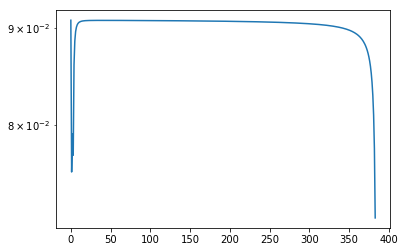

In [61]:
semilogy(total[:384])

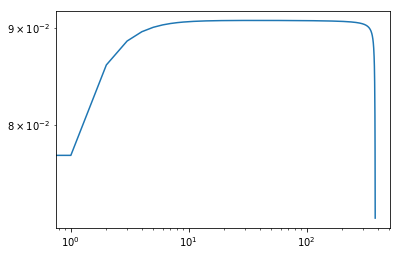

In [62]:
loglog(total[2:384])

In [63]:
np.mean(total[10:100]) * A_BB 

154.40969544937406

In [66]:
start=time.time()
total = np.zeros(800)
for ell1 in ells[1:-2]:
    for ell2 in ells[1:-2]:
        w3j, ellmin, ellmax = Wigner3j(ell1, ell2, 0, 0, 0 )
        indexmax = np.where(w3j!=0)[0][-1] + 1
        ellmax += 1
        norm = A_BB * (2 * ell1 + 1) * (2 * ell2 + 1) / (4*pi)
        total[ellmin:ellmax] = total[ellmin:ellmax] + norm * w3j[:indexmax]**2 * powerlaw(ell1, alpha_BB) * check_bcls[ell2]
        
end=time.time()
print('time taken = ' +str(end-start) + ' sec.')

time taken = 5.1253697872161865 sec.


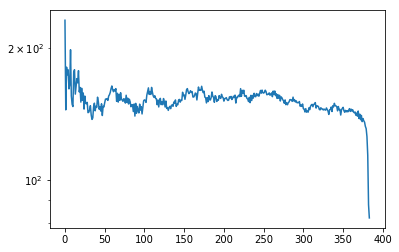

In [67]:
semilogy(total[:384])

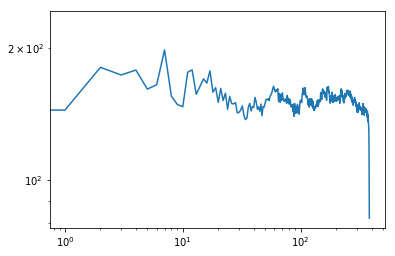

In [68]:
loglog(total[:384])

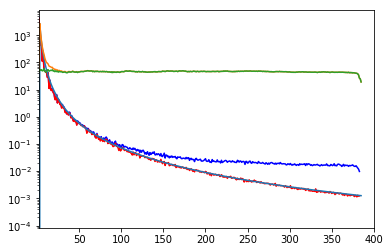

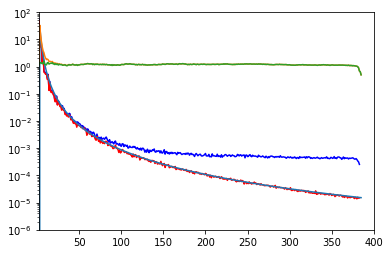

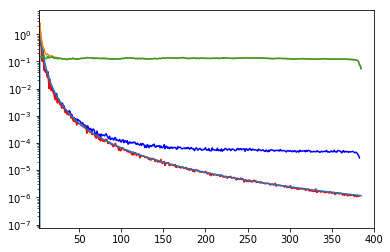

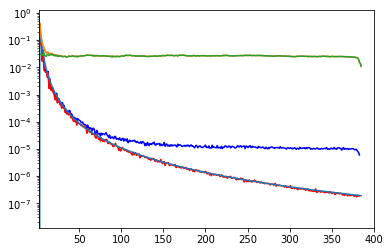

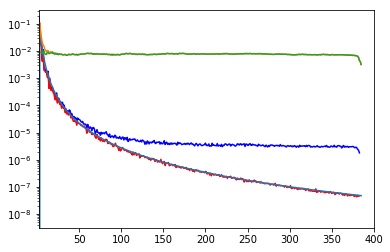

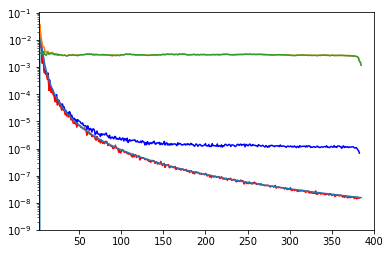

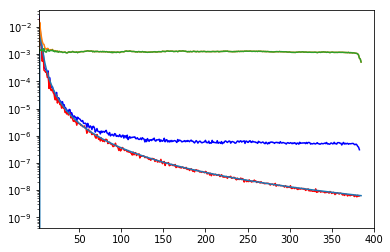

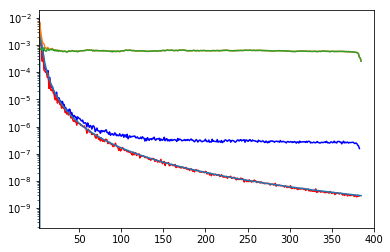

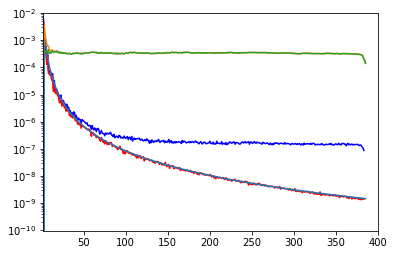

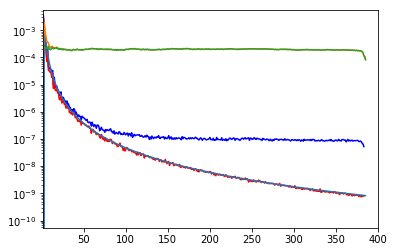

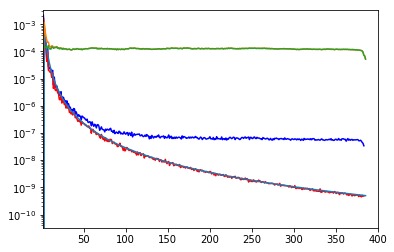

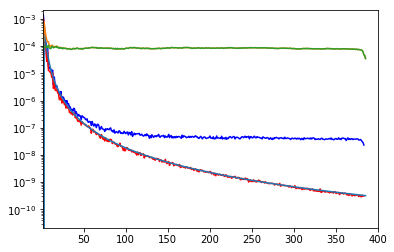

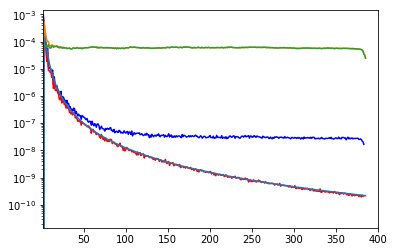

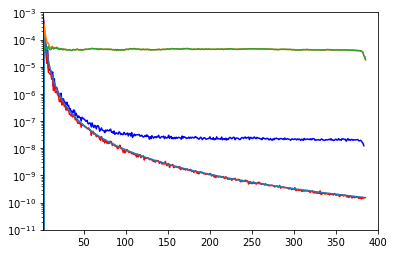

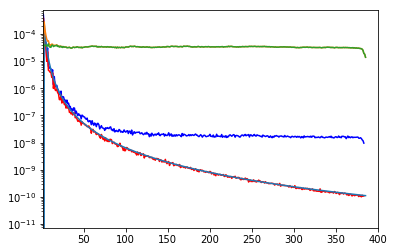

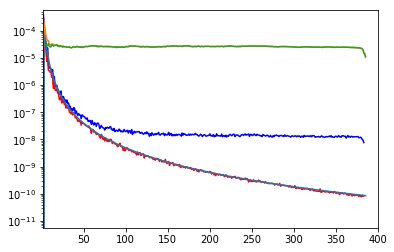

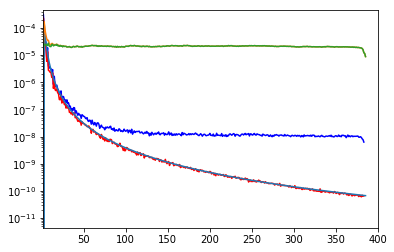

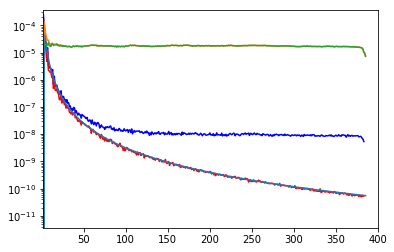

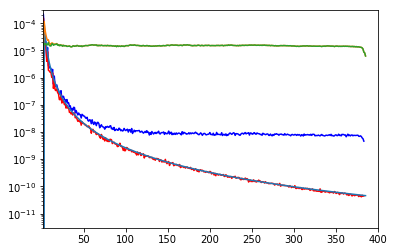

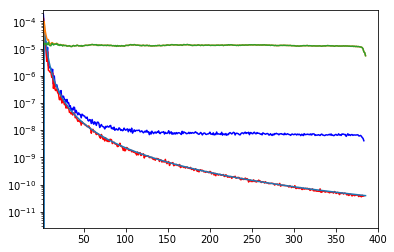

In [69]:
for k in range(20):
    figure()
    newcls = hp.anafast(x[k])
    oldcls = hp.anafast(newmaps[k])
    semilogy(newcls, 'b')
    semilogy(oldcls, 'r')
    semilogy(ells, pcls*sed_scaling[k]**2)
    moment1x1 = log(freqs[k]/2.3e9)**2 * sed_scaling[k]**2 * total[:385] * A_BB 
    semilogy(ells, moment1x1 + pcls*sed_scaling[k]**2)
    semilogy(ells, moment1x1)
    xlim(2, 400)
    ylim(1*sed_scaling[k]**2, 1e8 *sed_scaling[k]**2)

Text(0.5, 1.0, '100 GHz power spectra')

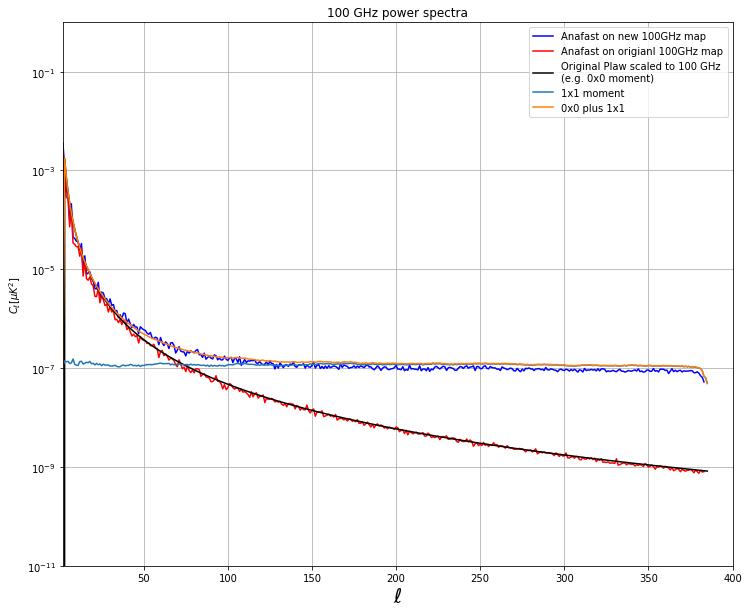

In [70]:
k = 9
figure(figsize=(12, 10))
newcls = hp.anafast(x[k])
oldcls = hp.anafast(newmaps[k])
semilogy(newcls, 'b', label='Anafast on new 100GHz map')
semilogy(oldcls, 'r', label='Anafast on origianl 100GHz map')
semilogy(ells, pcls*sed_scaling[k]**2, label='Original Plaw scaled to 100 GHz \n(e.g. 0x0 moment)', color='k')

moment1x1 = log(freqs[k]/2.3e9)**2 * sed_scaling[k]**2 * total[:385]
semilogy(ells, moment1x1, label='1x1 moment')
semilogy(ells, moment1x1 + pcls*sed_scaling[k]**2, label='0x0 plus 1x1')
xlim(2, 400)
ylim(1e-11, 1e0)
legend()
grid()
ylabel("$C_{\ell} [\mu K^2]$")
xlabel("$\ell$", fontsize=20)
title('100 GHz power spectra')
#savefig('moments_almost.pdf', format='pdf', dpi=300)

In [236]:
rcParams['lines.linewidth'] = 2
    
lsize = 20
rcParams['xtick.labelsize'] = lsize
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 5
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['xtick.bottom'] = True
rcParams['xtick.top'] = True
rcParams['xtick.direction'] = 'in'


rcParams['ytick.labelsize'] = lsize
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
rcParams['ytick.left'] = True
rcParams['ytick.right'] = True
rcParams['ytick.direction'] = 'in'


rcParams['legend.fontsize'] = lsize
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = lsize
rcParams['axes.titlesize'] = lsize

In [260]:
total2 = A_BB * powerlaw(ells, alpha_BB) * np.sum( (2. * ells + 1) * beta_cls)
total2[0] = 0
total2[1] = 0

/Data/abitbol/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


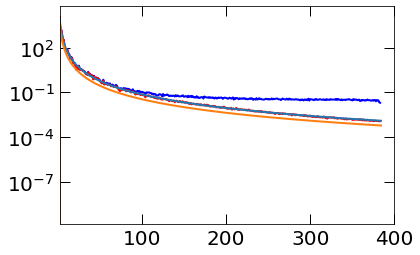

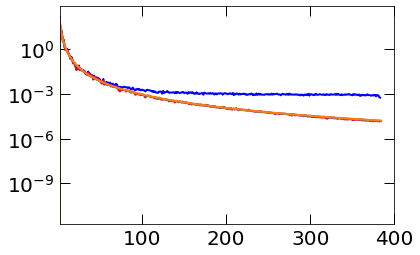

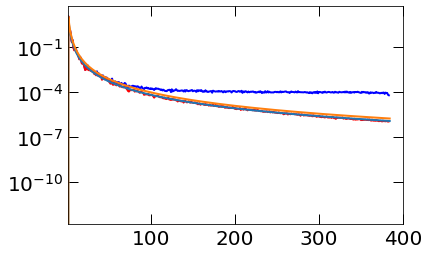

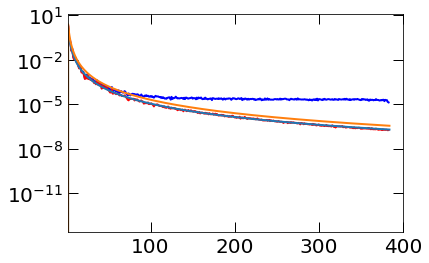

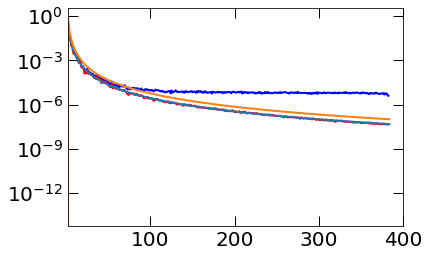

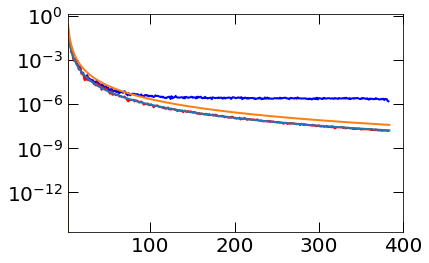

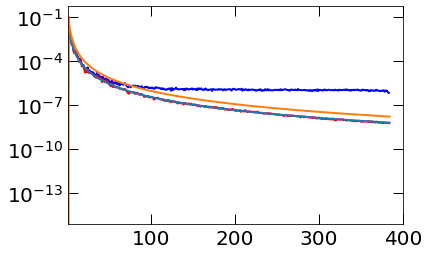

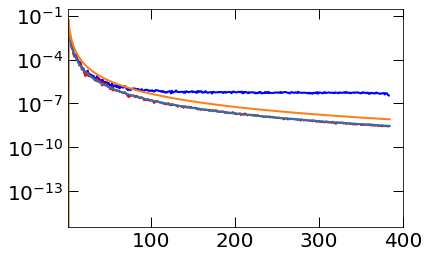

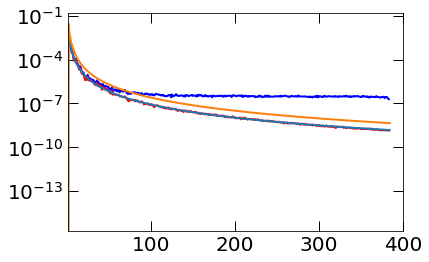

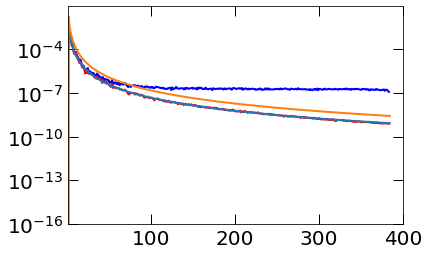

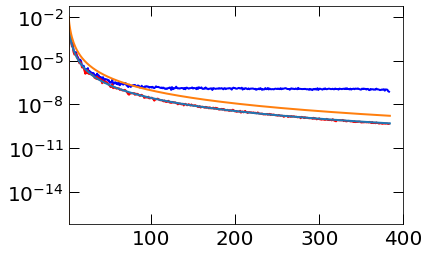

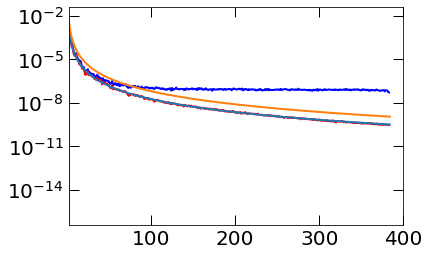

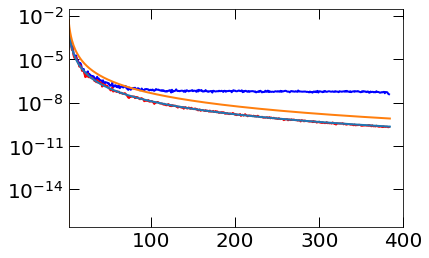

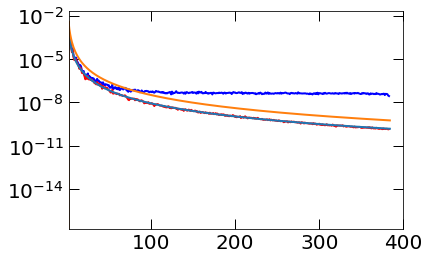

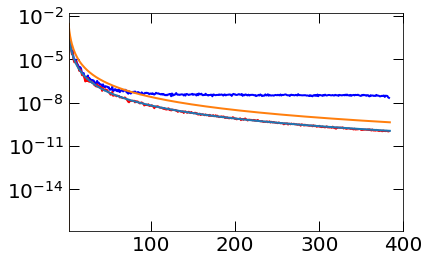

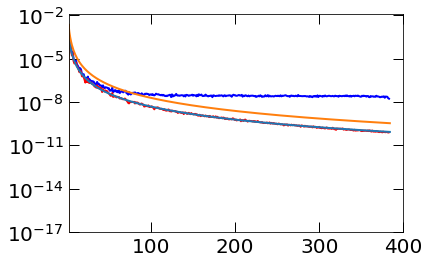

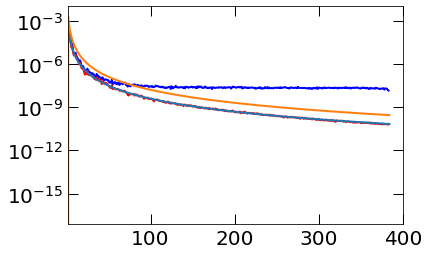

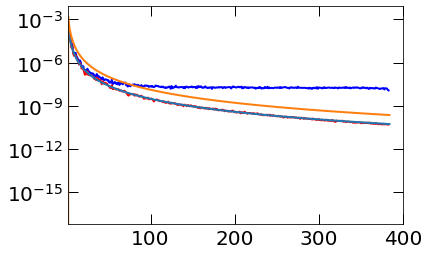

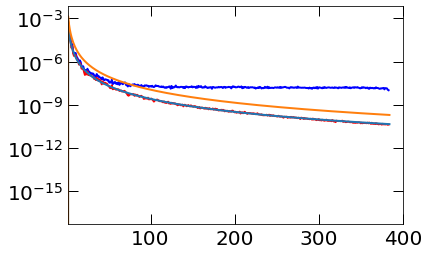

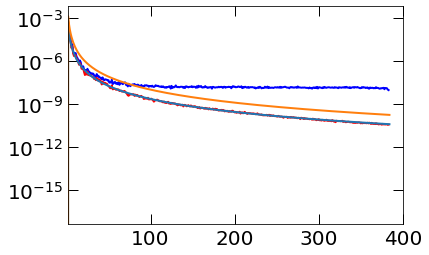

In [264]:
for k in range(20):
    figure()
    newcls = hp.anafast(x[k])
    oldcls = hp.anafast(newmaps[k])
    semilogy(newcls, 'b')
    semilogy(oldcls, 'r')
    semilogy(ells, pcls*sed_scaling[k]**2)
    
    #moment1x1 = log(freqs[k]/2.3e9)**2 * sed_scaling[k]**2 * total[:385] * A_BB 
    #semilogy(ells, moment1x1 + pcls*sed_scaling[k]**2)
    semilogy(ells, total2 * log(freqs[k]/2.3e9)**2 *sed_scaling[k]**2)
    
    xlim(2, 400)
    #ylim(1*sed_scaling[k]**2, 1e8 *sed_scaling[k]**2)